# Textual analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
import nltk
from nltk import tokenize

test_set = pd.read_csv('sets/Set 0.csv')
set_1 = pd.read_csv('sets/Set 1.csv')
set_2 = pd.read_csv('sets/Set 2.csv')
set_3 = pd.read_csv('sets/Set 3.csv')
set_4 = pd.read_csv('sets/Set 4.csv')

train_sets = [set_1, set_2, set_3, set_4]
full_train = pd.concat(train_sets)
Train_X = full_train["Ementa + texto completo"]

média de palavras por sentença:
Média de palavras por senteça:  23.489005122545198
Mediana de palavras por senteça:  19.0
terceiro quartil de palavras por sentença:  34.0
percentil 80 de palavras por sentença:  38.0
percentil 85 de palavras por sentença:  43.0
percentil 90 de palavras por sentença:  49.0
percentil 95 de palavras por sentença:  60.0
percentil 100 de palavras por sentença:  425.0


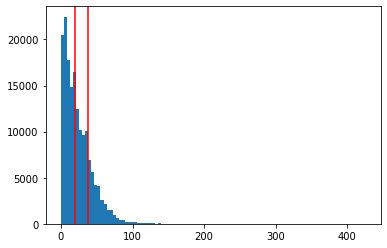

In [2]:
limit = 950

def get_num_sentences(dataset):
    sentences = np.zeros(len(dataset), dtype='int32')
    words = []
    for i, document in enumerate(dataset):
        tokenized_document = tokenize.sent_tokenize(document)
        sentences[i] = len(tokenized_document)
        mean_words = 0
        i=0
        for j, sent in enumerate(tokenized_document):
            wordTokens = text_to_word_sequence(sent)
            words.append(len(wordTokens))
            i+=1
            if i == limit:
                break
    return sentences, words


sentence_counter, words_per_sentence_counter = get_num_sentences(Train_X)

print("média de palavras por sentença:")
plt.hist(words_per_sentence_counter, bins=100)
plt.axvline(x = np.percentile(words_per_sentence_counter, 50), color="red" )
plt.axvline(x = np.percentile(words_per_sentence_counter, 80), color="red" )
print("Média de palavras por senteça: ", np.mean(words_per_sentence_counter))
print("Mediana de palavras por senteça: ", np.median(words_per_sentence_counter))
print("terceiro quartil de palavras por sentença: ", np.percentile(words_per_sentence_counter, 75))
print("percentil 80 de palavras por sentença: ", np.percentile(words_per_sentence_counter, 80))
print("percentil 85 de palavras por sentença: ", np.percentile(words_per_sentence_counter, 85))
print("percentil 90 de palavras por sentença: ", np.percentile(words_per_sentence_counter, 90))
print("percentil 95 de palavras por sentença: ", np.percentile(words_per_sentence_counter, 95))
print("percentil 100 de palavras por sentença: ", np.percentile(words_per_sentence_counter, 100))
plt.show()

Senteças por decreto
Média de sentenças por decreto:  32.480355119002645
Mediana de sentenças por decreto:  11.0
percentil 75 de sentenças por decreto:  29.0
percentil 80 de sentenças por decreto:  37.0
percentil 85 de sentenças por decreto:  49.0
percentil 90 de sentenças por decreto:  68.0
percentil 95 de sentenças por decreto:  106.0


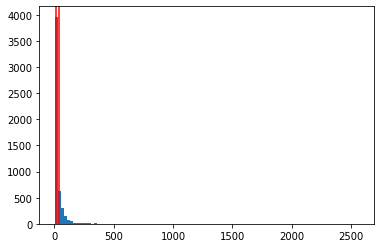

In [9]:
limit = 950

def get_num_sentences(dataset):
    sentences = np.zeros(len(dataset), dtype='int32')
    words = []
    for i, document in enumerate(dataset):
        tokenized_document = tokenize.sent_tokenize(document)
        sentences[i] = len(tokenized_document)
        mean_words = 0
        i=0
        for j, sent in enumerate(tokenized_document):
            wordTokens = text_to_word_sequence(sent)
            words.append(len(wordTokens))
            i+=1
            if i == limit:
                break
    return sentences, words


sentence_counter, words_per_sentence_counter = get_num_sentences(Train_X)

print("Senteças por decreto")
plt.hist(sentence_counter, bins=100)
plt.axvline(x = np.percentile(sentence_counter, 50), color="red" )
plt.axvline(x = np.percentile(sentence_counter, 80), color="red" )
print("Média de sentenças por decreto: ", sentence_counter.mean())
print("Mediana de sentenças por decreto: ", np.median(sentence_counter))
print("percentil 75 de sentenças por decreto: ", np.percentile(sentence_counter, 75))
print("percentil 80 de sentenças por decreto: ", np.percentile(sentence_counter, 80))
print("percentil 85 de sentenças por decreto: ", np.percentile(sentence_counter, 85))
print("percentil 90 de sentenças por decreto: ", np.percentile(sentence_counter, 90))
print("percentil 95 de sentenças por decreto: ", np.percentile(sentence_counter, 95))
plt.show()

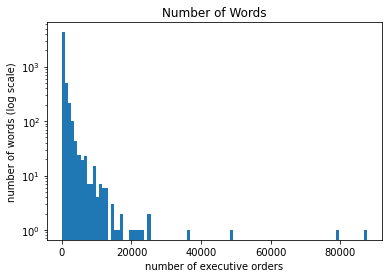

Media:  853.5727238383075
Mediana:  335.0
percentil 90 de sentenças por decreto:  1742.499999999999


In [12]:
#checking number of words
sizes = [len(i.replace(".", "").split(" ")) for i in Train_X]
plt.title("Number of Words")
plt.ylabel("number of words (log scale)")
plt.xlabel("number of executive orders")
plt.hist(sizes, bins=100, log=True)
plt.show()

print("Media: ", np.mean(sizes))
print("Mediana: ", np.median(sizes))
print("percentil 90 de palavras por decreto: ", np.percentile(sizes, 90))

# Classes analysis

In [2]:
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt

def string_to_array_serie(serie):
    return [[int(i) for i in t.replace("[", "").replace("]", "").split()] for t in serie]

sen_labels = string_to_array_serie(pd.concat([test_set, set_1, set_2, set_3, set_4])["Senado"])
minist_labels = string_to_array_serie(pd.concat([test_set, set_1, set_2, set_3, set_4])["Referenda"])

## Senate co-occurrence

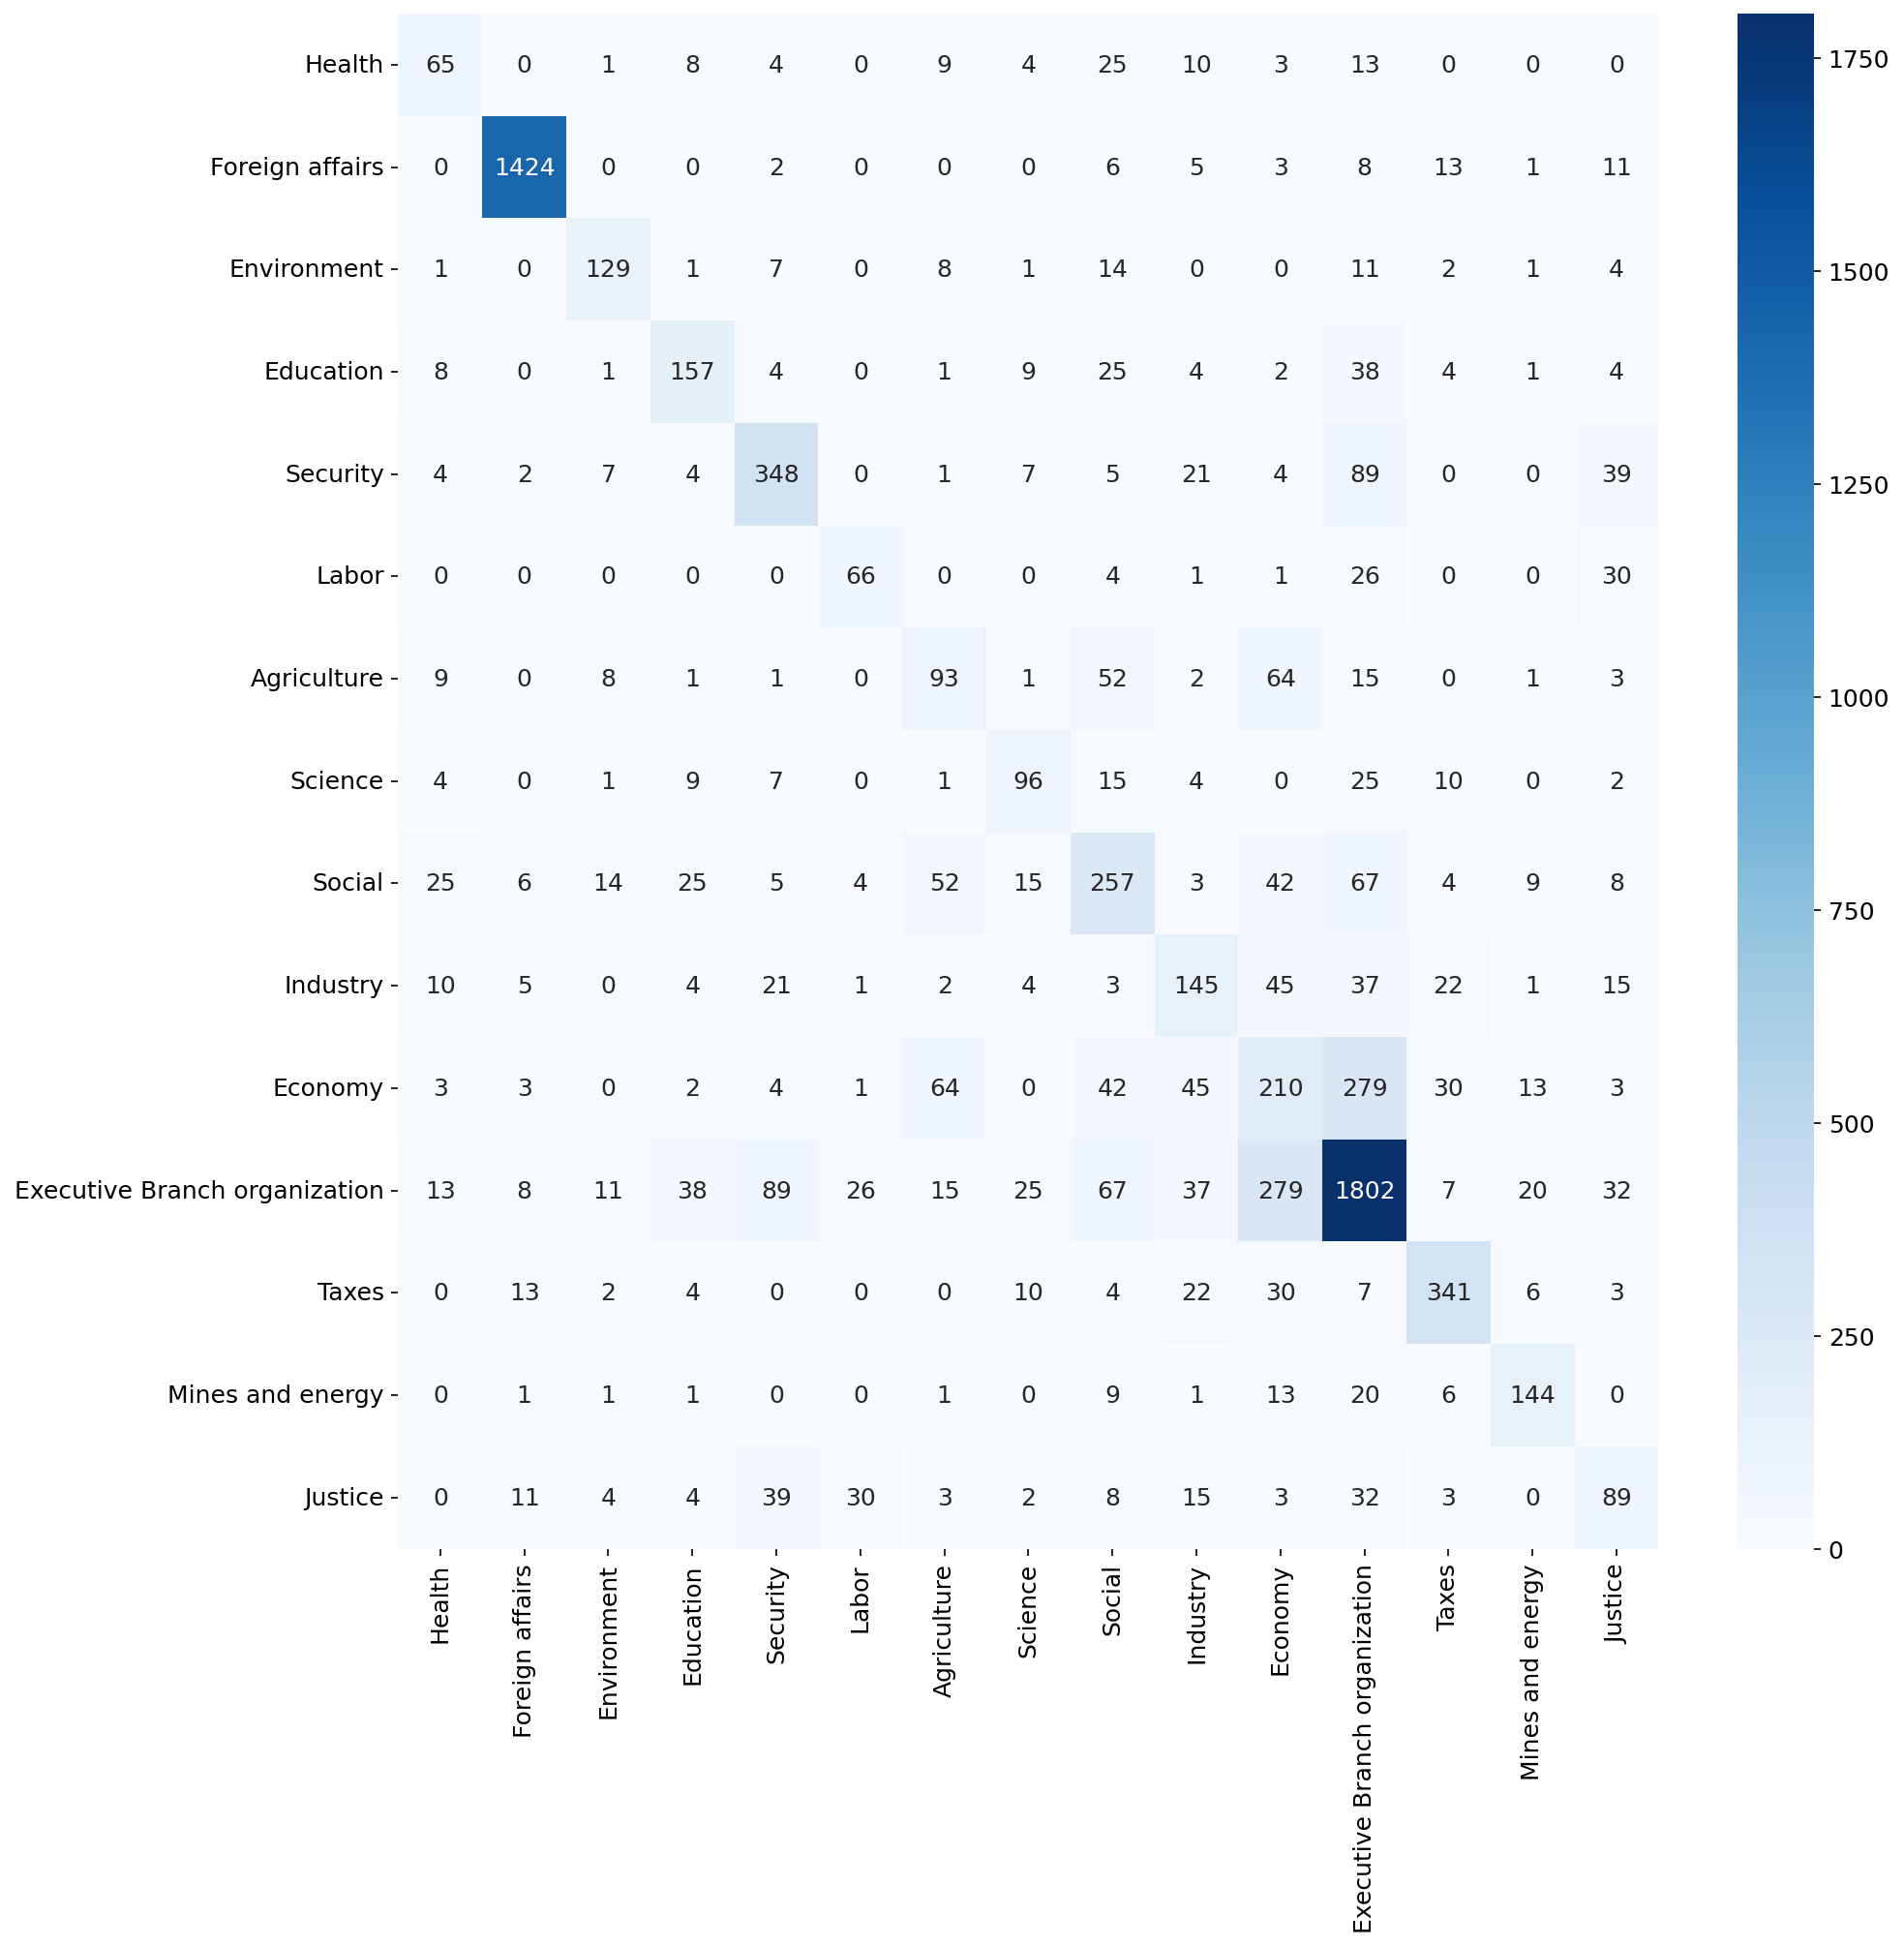

In [3]:
# Original version
plt.rcParams["figure.figsize"] = (14,14)
plt.rcParams["figure.dpi"] = (150)
plt.rcParams.update({'font.size': 12})

labels_sen = ["Saúde", "Relações Exteriores", "Meio ambiente", "Educação", "Segurança", "Trabalho", "Agropecuária", "Ciência", "Social", "Indústria", "Economia", "Assuntos internos", "Tributos", "Minas e energia", "Justiça e direitos"]
labels_sen = ["Health", "Foreign affairs", "Environment", "Education", "Security", "Labor", "Agriculture", "Science", "Social", "Industry", "Economy", "Executive Branch organization", "Taxes", "Mines and energy", "Justice"]

counter_sen = np.zeros((len(sen_labels[0]), len(sen_labels[0])))
for i in range(len(sen_labels[0])):
    for j in range(len(sen_labels[0])):
        for document in (sen_labels):
            if (i == j and np.sum(document) == 1 and document[i] == 1):
                counter_sen[i, j]+=1
            elif (i != j and document[i] == 1 and document[j] == 1):
                counter_sen[i, j]+=1
            

heatmap(counter_sen.astype(int), cmap = 'Blues', annot=True, fmt='g', xticklabels=labels_sen, yticklabels=labels_sen)
plt.show()

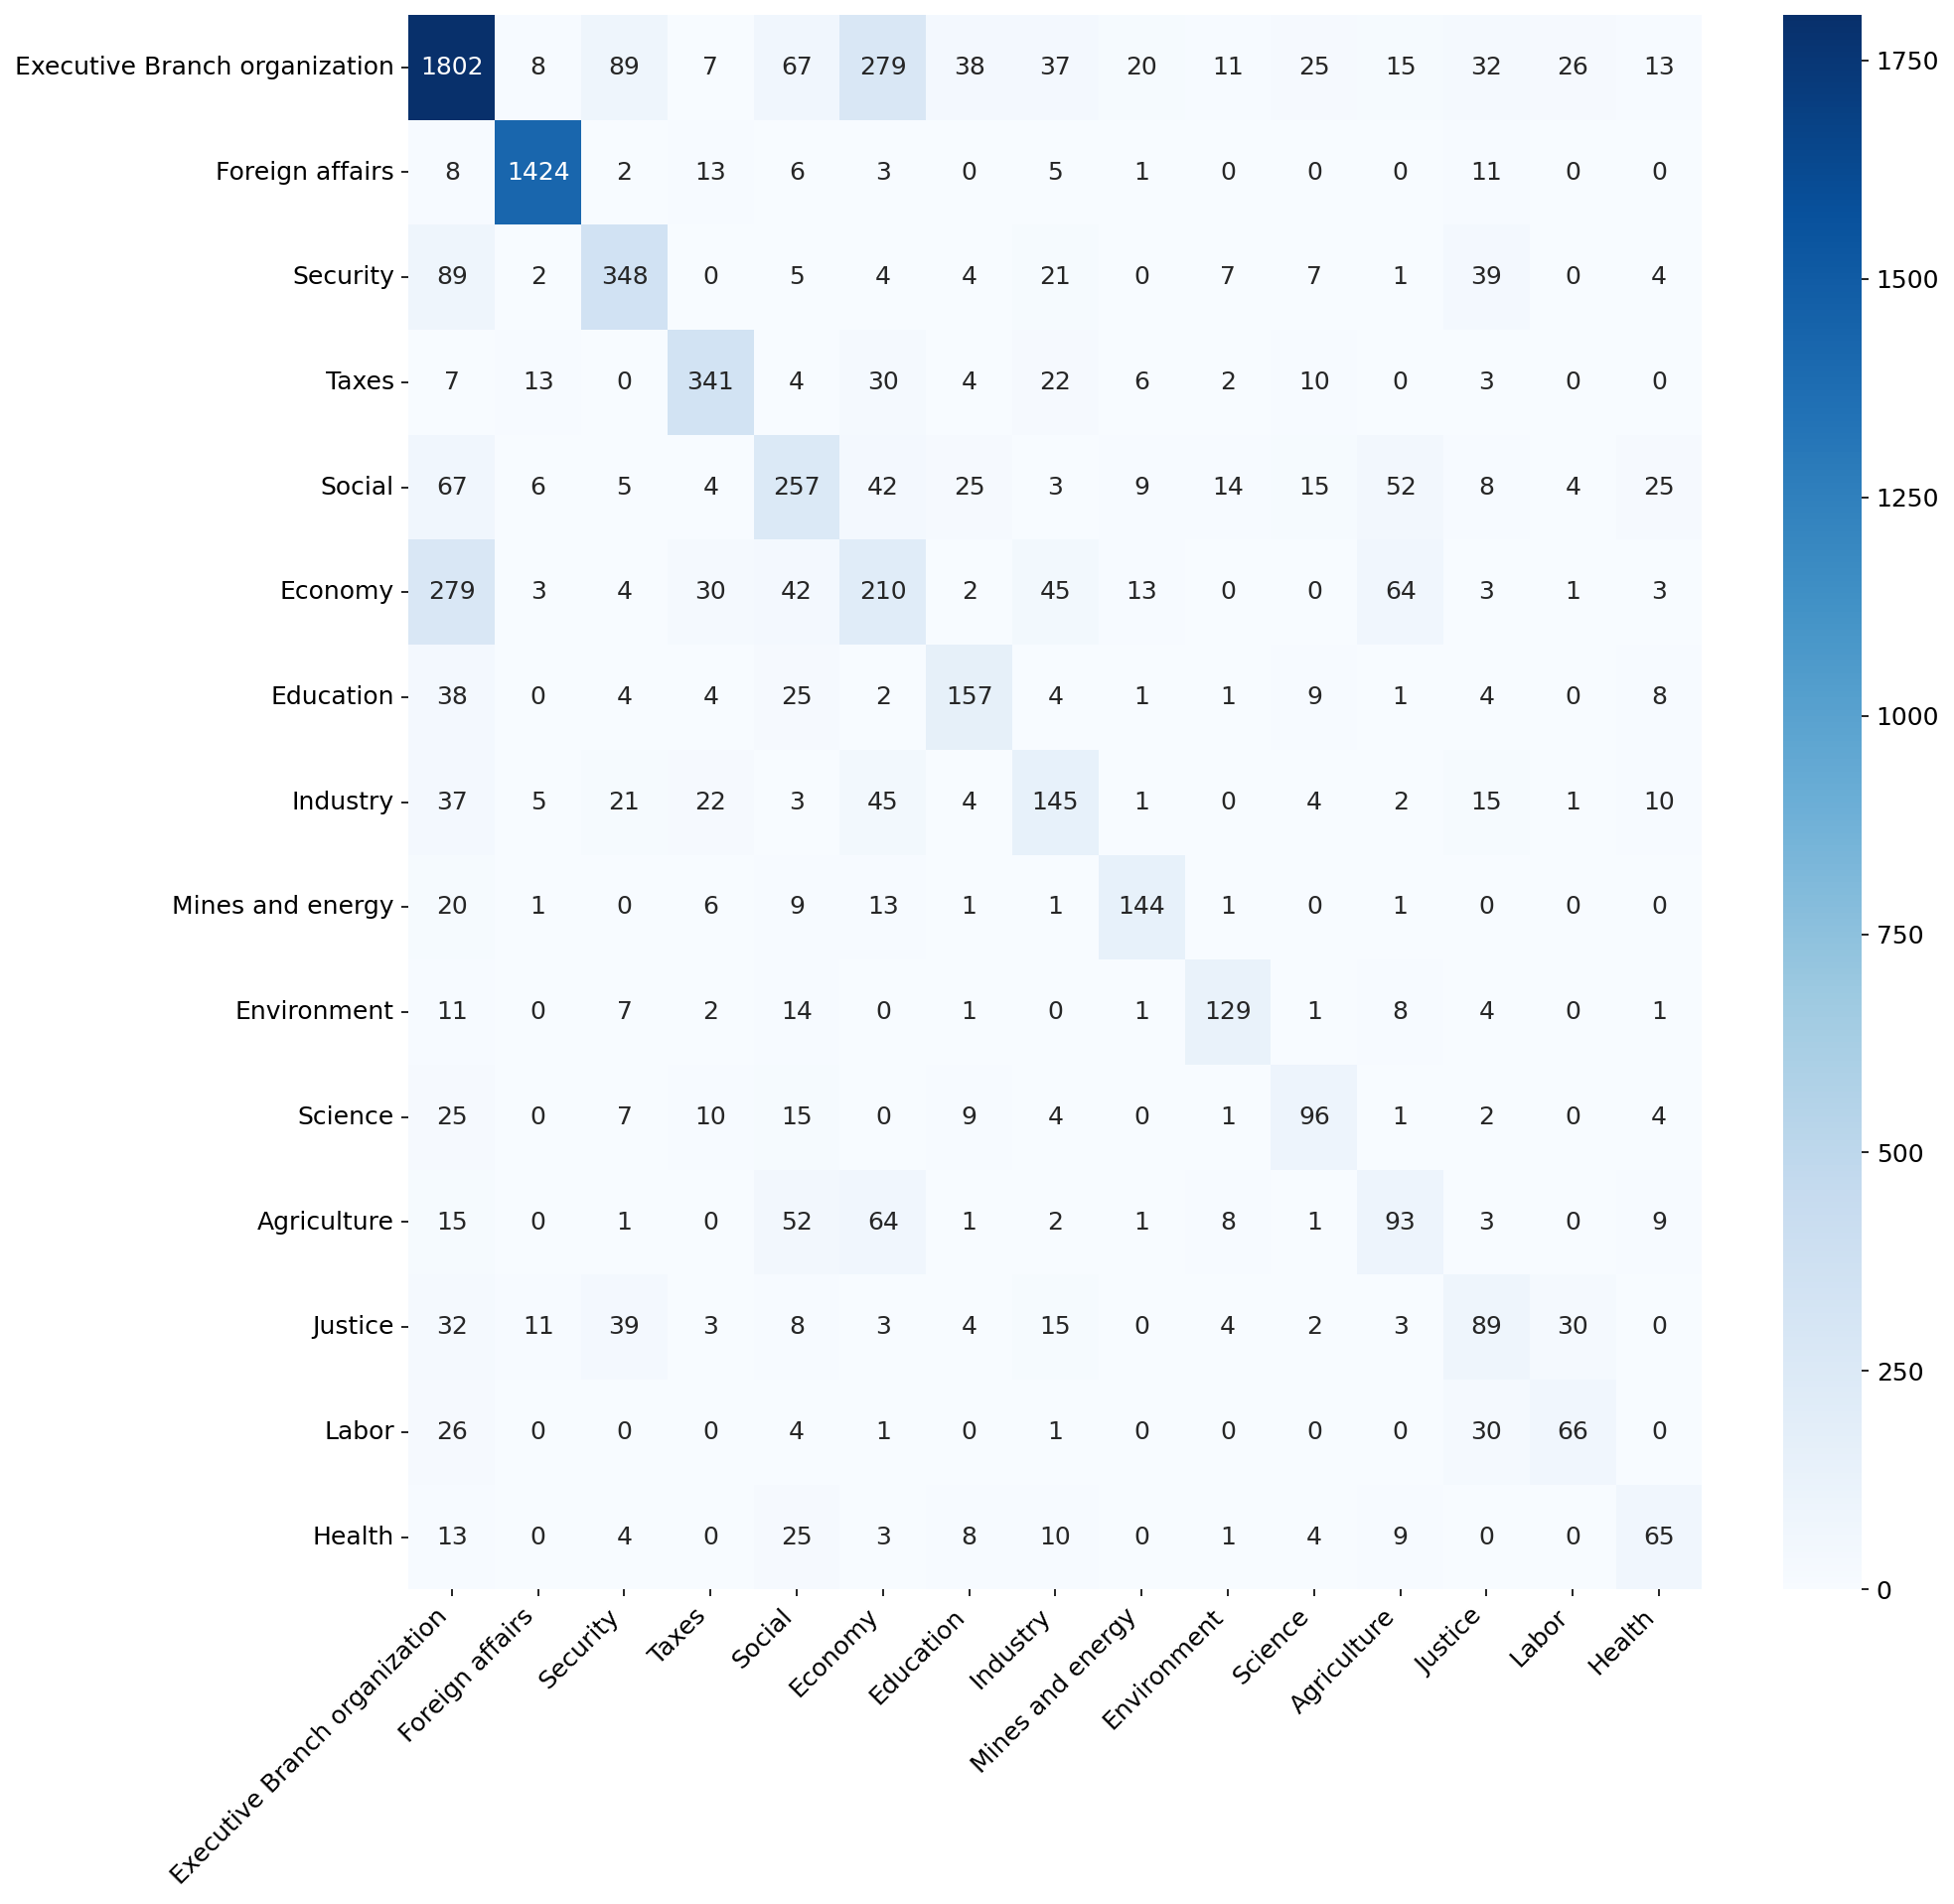

In [4]:
# Sorted version
ordered_counter_sen = np.zeros(counter_sen.shape)
aux_counter_sen = np.zeros(counter_sen.shape)
sorted_diag = np.argsort(np.diag(counter_sen))[::-1]

for (j, i) in enumerate(sorted_diag):
    aux_counter_sen[j, :] = counter_sen[i, :]
    
for (j, i) in enumerate(sorted_diag):
    ordered_counter_sen[:, j] = aux_counter_sen[:, i]

heatmap(ordered_counter_sen.astype(int), cmap = 'Blues', annot=True, fmt='g', xticklabels=np.array(labels_sen)[sorted_diag], yticklabels=np.array(labels_sen)[sorted_diag])
plt.xticks(rotation=45, ha='right')
plt.show()

## Cabinets co-occurrence

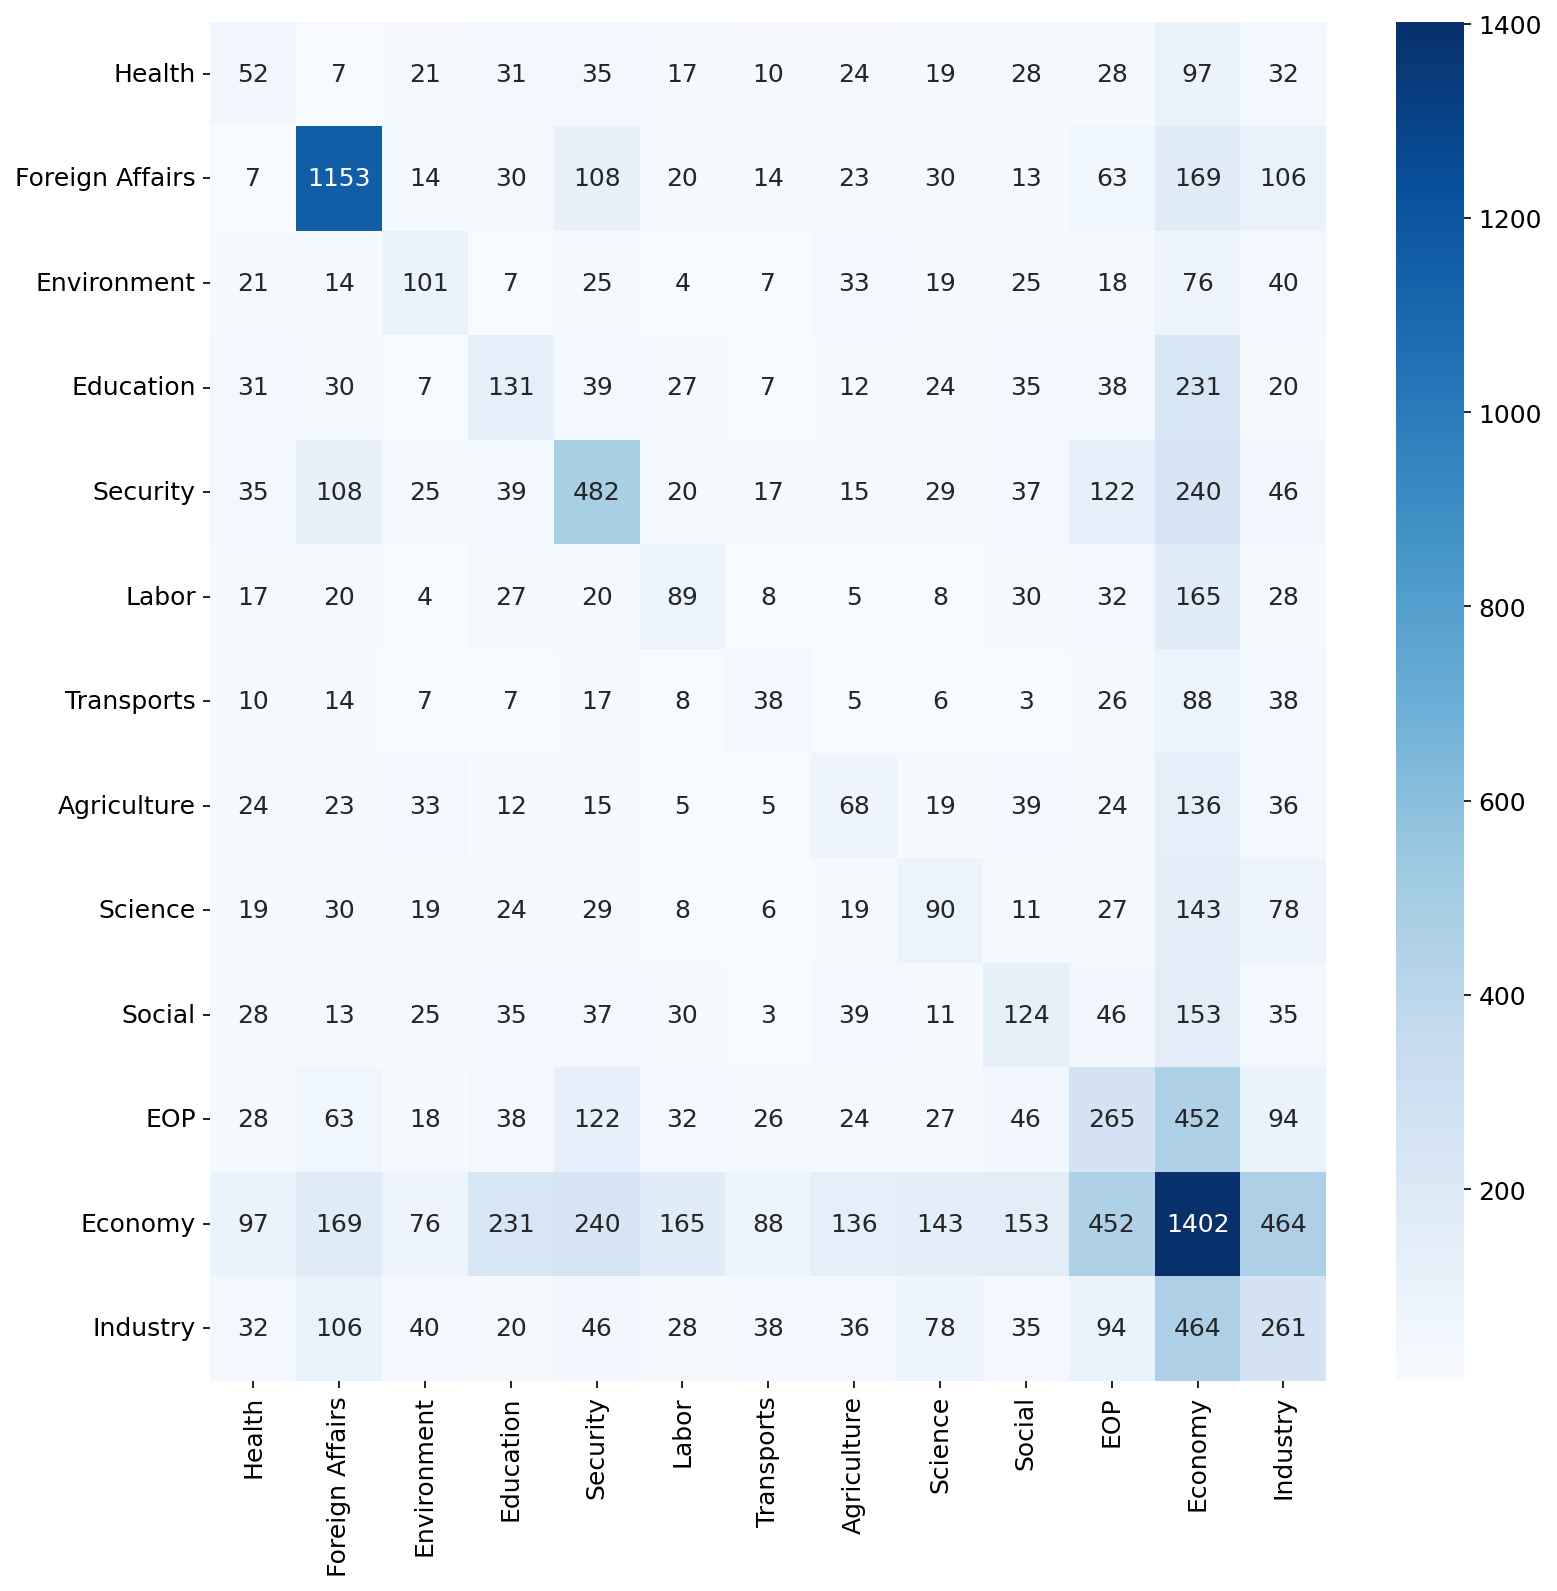

In [33]:
### Original version
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["figure.dpi"] = (150)
labels_minist=["Saúde", "Relações Exteriores", "Meio ambiente", "Educação", "Segurança", "Trabalho", "Transportes", "Agropecuária", "Ciência", "Social", "Presidência", "Economia", "Indústria"]
labels_minist = ["Health", "Foreign Affairs", "Environment", "Education", "Security", "Labor", "Transports", "Agriculture", "Science", "Social", "EOP", "Economy", "Industry"]


counter_minist = np.zeros((len(minist_labels[0]), len(minist_labels[0])))
for i in range(len(minist_labels[0])):
    for j in range(len(minist_labels[0])):
        for document in (minist_labels):
            if (i == j and np.sum(document) == 1 and document[i] == 1):
                counter_minist[i, j]+=1
            if(i != j and document[i] == 1 and document[j] == 1):
                counter_minist[i, j]+=1

heatmap(counter_minist.astype(int), cmap = 'Blues', annot=True, fmt='g', xticklabels=labels_minist, yticklabels=labels_minist)
plt.show()

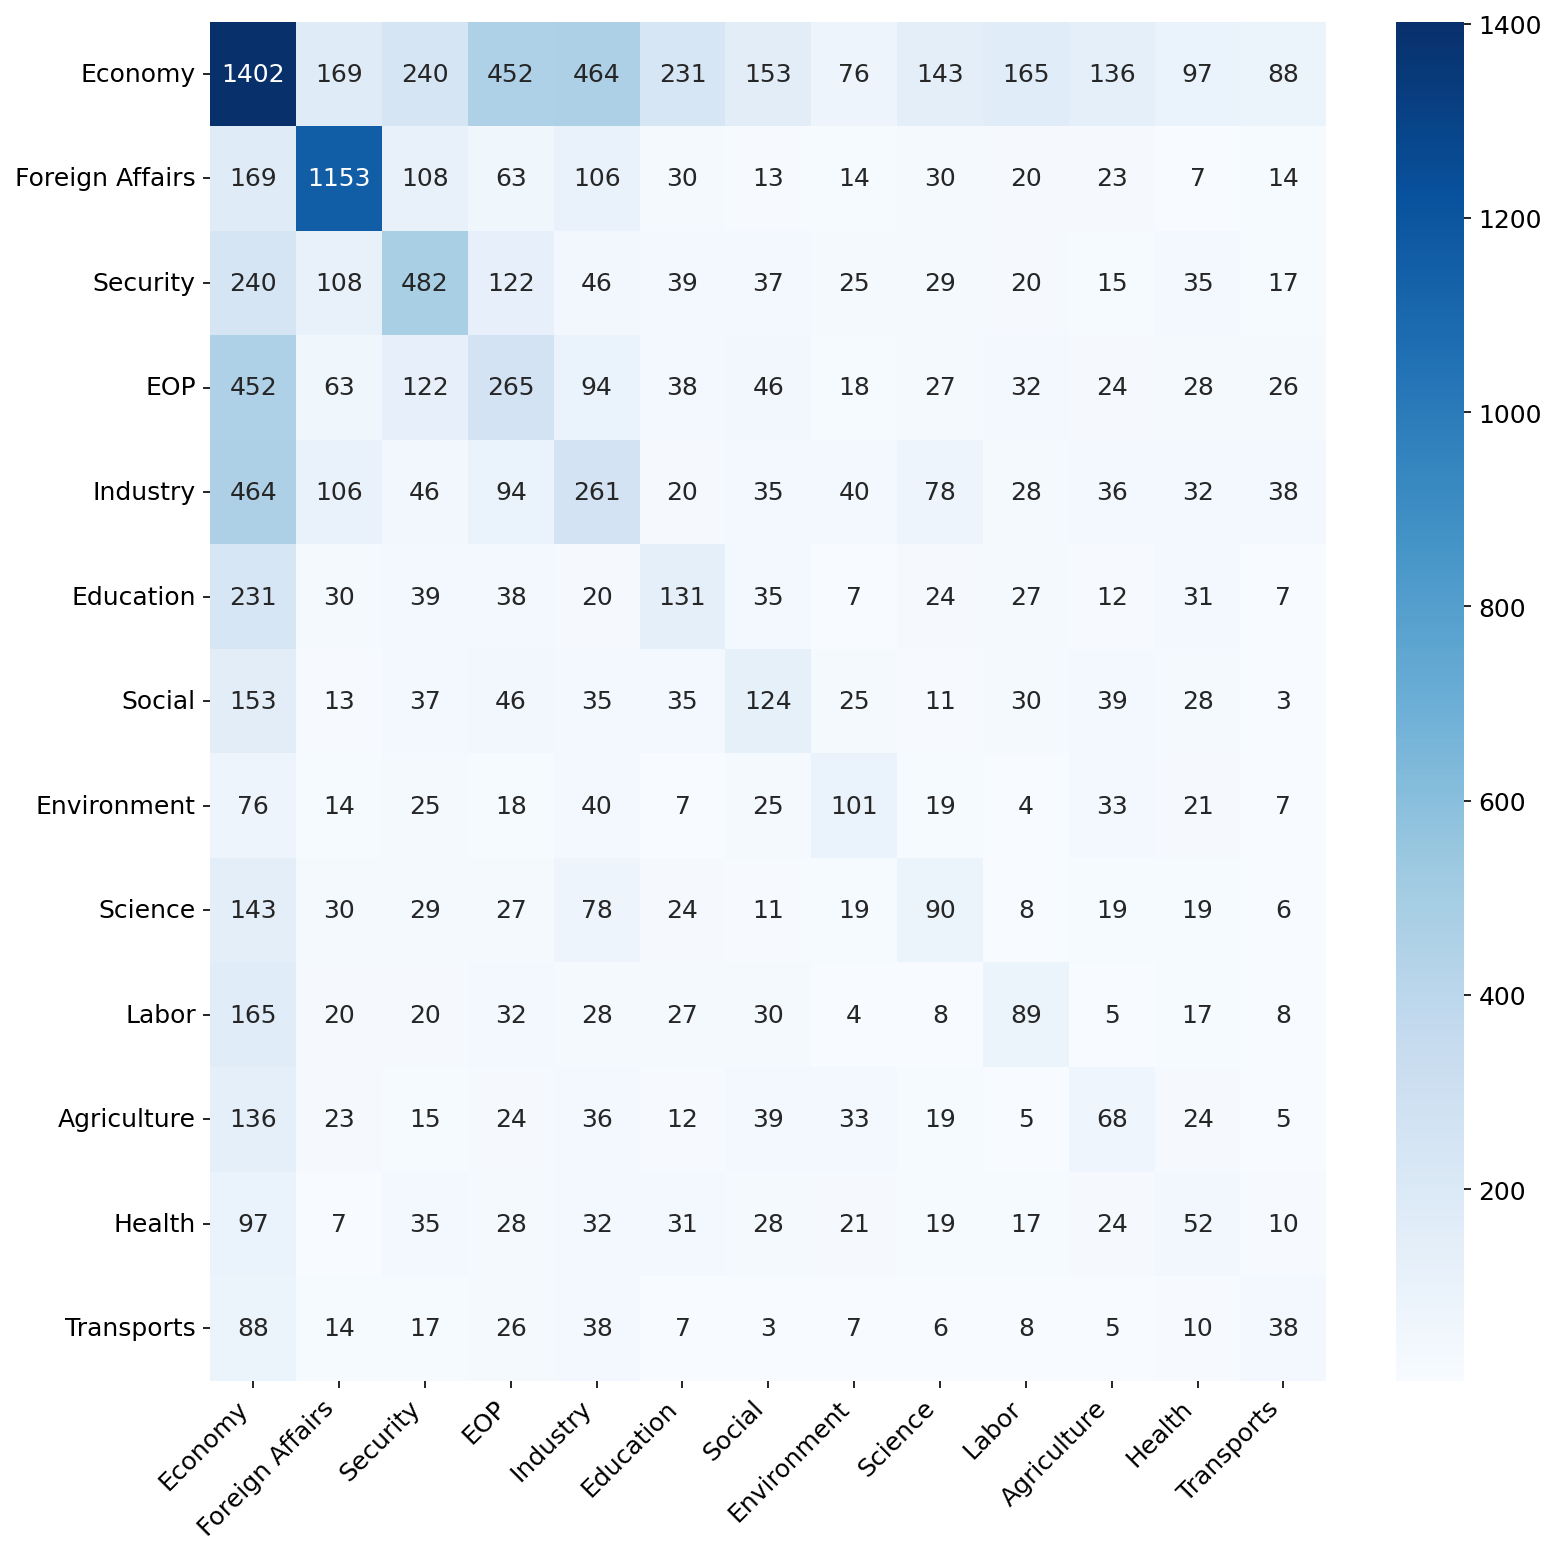

In [34]:
# Sorted version
ordered_counter_minist = np.zeros(counter_minist.shape)
aux_counter_minist = np.zeros(counter_minist.shape)
sorted_diag = np.argsort(np.diag(counter_minist))[::-1]

for (j, i) in enumerate(sorted_diag):
    aux_counter_minist[j, :] = counter_minist[i, :]
    
for (j, i) in enumerate(sorted_diag):
    ordered_counter_minist[:, j] = aux_counter_minist[:, i]

heatmap(ordered_counter_minist.astype(int), cmap = 'Blues', annot=True, fmt='g', xticklabels=np.array(labels_minist)[sorted_diag], yticklabels=np.array(labels_minist)[sorted_diag])
plt.xticks(rotation=45, ha='right')
plt.show()

## Senate and cabinets intersection

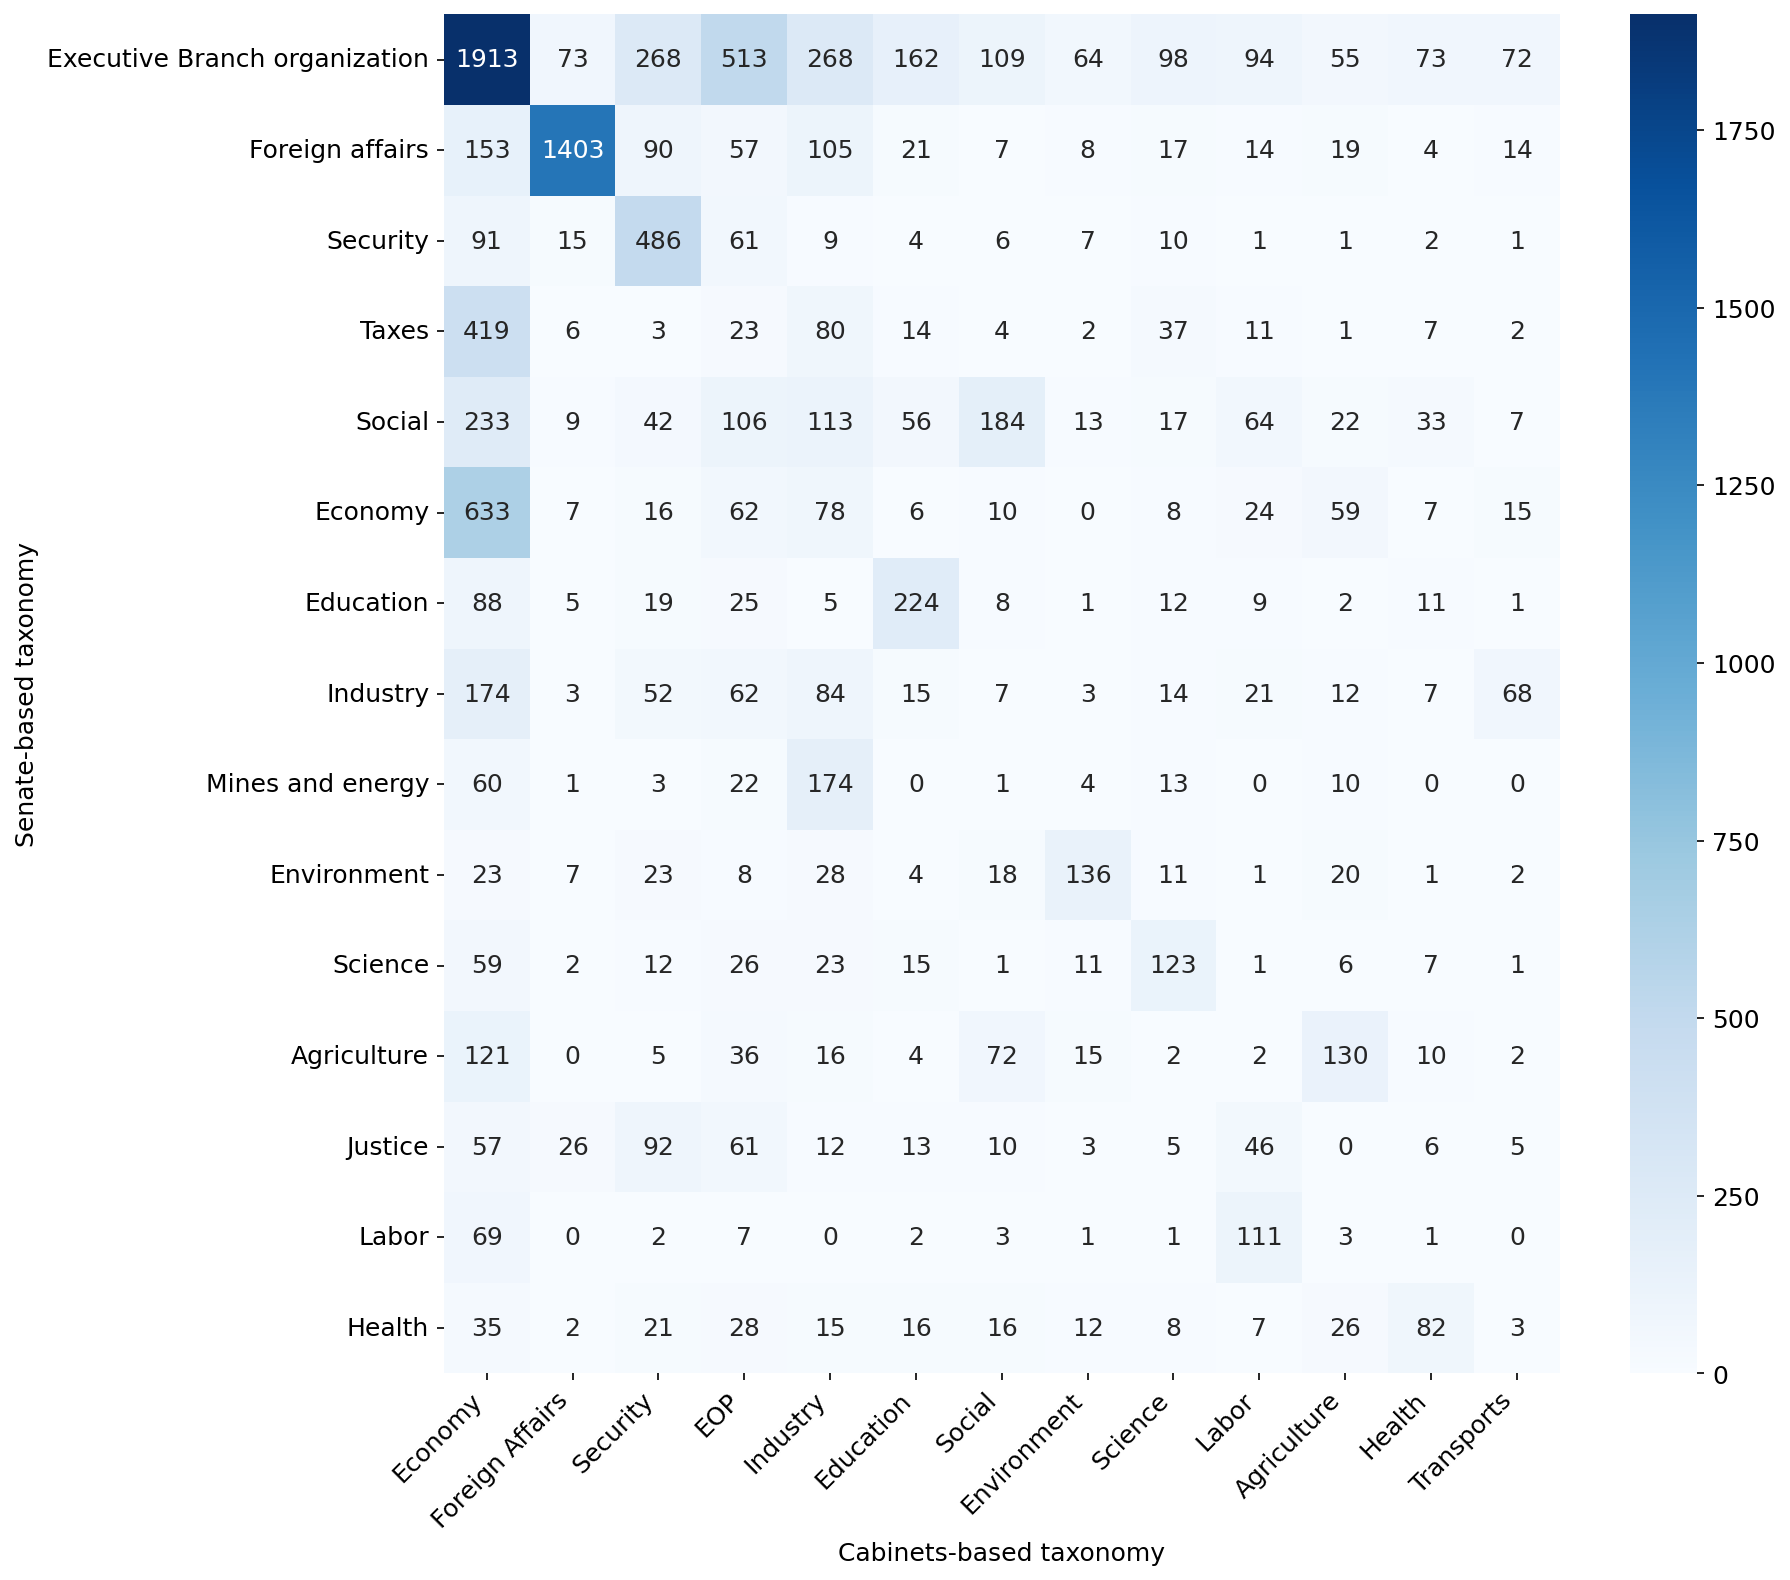

In [40]:
# Colocar em ordem alfabética
import matplotlib_inline
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["figure.dpi"] = (150)
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

counter_total = np.zeros((len(sen_labels[0]), len(minist_labels[0])))
for i in range(len(sen_labels[0])):
    for j in range(len(minist_labels[0])):
        for d in range(len(minist_labels)):
            if(sen_labels[d][i] == 1 and minist_labels[d][j] == 1):
                counter_total[i, j]+=1
                
                
# Sort by class name
ordered_counter_total = np.zeros(counter_total.shape)
aux_counter_total = np.zeros(counter_total.shape)

sorted_sen = np.argsort(labels_sen)
sorted_minist = np.argsort(labels_minist)

sorted_sen = np.argsort(np.diag(counter_sen))[::-1]
sorted_minist = np.argsort(np.diag(counter_minist))[::-1]

for (j, i) in enumerate(sorted_sen):
    aux_counter_total[j, :] = counter_total[i, :]

for (j, i) in enumerate(sorted_minist):
    ordered_counter_total[:, j] = aux_counter_total[:, i]

# heatmap(counter_total.astype(int), cmap = 'Blues', annot=True, fmt='g', xticklabels=labels_minist, yticklabels=labels_sen)
heatmap(ordered_counter_total.astype(int), cmap = 'Blues', annot=True, fmt='g', xticklabels=np.array(labels_minist)[sorted_minist], yticklabels=np.array(labels_sen)[sorted_sen])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Cabinets-based taxonomy")
plt.ylabel("Senate-based taxonomy")
plt.show()